# Exercise 2.1

In [1]:
using LinearAlgebra
using SparseArrays
using Plots
using Polynomials

In [2]:
function xy(
    x0::Float64, 
    y0::Float64, 
    L1::Float64, 
    L2::Float64, 
    noelms1::Int64, 
    noelms2::Int64
)::Tuple{Vector{Float64}, Vector{Float64}}
    VX = repeat(collect(LinRange(x0, x0+L1, noelms1+1)), inner=noelms2+1)
    VY = repeat(collect(LinRange(y0+L2, y0, noelms2+1)), noelms1+1)
    return VX, VY
end

x0 = -2.5
y0 = -4.8
L1 = 7.6
L2 = 5.9
noelms1 = 4
noelms2 = 3

VX, VY = xy(x0, y0, L1, L2, noelms1, noelms2)
display(VX)
display(VY)

20-element Vector{Float64}:
 -2.5
 -2.5
 -2.5
 -2.5
 -0.6000000000000001
 -0.6000000000000001
 -0.6000000000000001
 -0.6000000000000001
  1.2999999999999998
  1.2999999999999998
  1.2999999999999998
  1.2999999999999998
  3.1999999999999997
  3.1999999999999997
  3.1999999999999997
  3.1999999999999997
  5.1
  5.1
  5.1
  5.1

20-element Vector{Float64}:
  1.1000000000000005
 -0.8666666666666661
 -2.833333333333333
 -4.8
  1.1000000000000005
 -0.8666666666666661
 -2.833333333333333
 -4.8
  1.1000000000000005
 -0.8666666666666661
 -2.833333333333333
 -4.8
  1.1000000000000005
 -0.8666666666666661
 -2.833333333333333
 -4.8
  1.1000000000000005
 -0.8666666666666661
 -2.833333333333333
 -4.8

In [3]:
function conelmtab(noelms1::Int64, noelms2::Int64)::Matrix{Int64}
    k = [i for i in 1:(noelms1*(noelms2+1)) if i % (noelms2+1) != 0]

    return [
        k (2 + noelms2 .+ k) (1 + noelms2 .+ k);
        k (1 .+ k) (2 + noelms2 .+ k)
    ]
end

EToV = conelmtab(noelms1, noelms2)
display(EToV)

24×3 Matrix{Int64}:
  1   6   5
  2   7   6
  3   8   7
  5  10   9
  6  11  10
  7  12  11
  9  14  13
 10  15  14
 11  16  15
 13  18  17
 14  19  18
 15  20  19
  1   2   6
  2   3   7
  3   4   8
  5   6  10
  6   7  11
  7   8  12
  9  10  14
 10  11  15
 11  12  16
 13  14  18
 14  15  19
 15  16  20

# Exercise 2.2

In [4]:
function basfun(n::Int64, VX::Vector{Float64}, VY::Vector{Float64}, EToV::Matrix{Int64})::Tuple{Float64, Matrix{Float64}}
    abc = zeros(3,3)

    i1 = EToV[n,1]
    i2 = EToV[n,2]
    i3 = EToV[n,3]

    for (n, (j,k)) in enumerate([[i2,i3], [i3,i1], [i1,i2]])
        abc[n,1] = VX[j]*VY[k] - VX[k]*VY[j]
        abc[n,2] = VY[j] - VY[k]
        abc[n,3] = VX[k] - VX[j]
    end

    delta = sum(abc[:,1])/2

    return delta, abc
end

n = 4
delta, abc = basfun(n, VX, VY, EToV)
display(delta)
display(abc)

1.8683333333333332

3×3 Matrix{Float64}:
  2.55667  -1.96667   0.0
  2.09      0.0      -1.9
 -0.91      1.96667   1.9

In [5]:
function outernormal(
    n::Int64, 
    k::Int64, 
    VX::Vector{Float64}, 
    VY::Vector{Float64},
    EToV::Matrix{Int64}
)::Tuple{Float64, Float64}
    i1 = EToV[n, k]
    i2 = EToV[n, k % 3 + 1]

    dx = VX[i2] - VX[i1]
    dy = VY[i2] - VY[i1]

    norm = sqrt(dx^2 + dy^2)
    n1 = dy / norm
    n2 = -dx / norm

    return n1, n2
end

for k in 1:3
    display(outernormal(n,k,VX,VY,EToV))
end

(-0.7191913900847712, -0.6948120209293551)

(1.0, -0.0)

(0.0, 1.0)

# Exercise 2.3

20×20 Matrix{Float64}:
  1.00059   -0.483051   0.0       …   0.0        0.0        0.0
 -0.483051   2.00119   -0.483051      0.0        0.0        0.0
  0.0       -0.483051   2.00119       0.0        0.0        0.0
  0.0        0.0       -0.483051      0.0        0.0        0.0
 -0.517544   0.0        0.0           0.0        0.0        0.0
  0.0       -1.03509    0.0       …   0.0        0.0        0.0
  0.0        0.0       -1.03509       0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0       …   0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0           0.0        0.0        0.0
  0.0        0.0        0.0          -1.03509    0.0        0.0
  0.0        0.0        0.0           0.0       -1.03509    0.0
  0.0        0.0 

20-element Vector{Float64}:
    9.383185185185186
    9.950604938271605
    2.6018271604938272
    0.5674197530864201
   -0.899567901234565
   -0.4982222222222199
  -15.195777777777774
   -6.9474320987654306
  -22.19856790123456
  -43.09622222222222
  -57.79377777777776
  -28.24643209876542
  -43.49756790123456
  -85.69422222222221
 -100.39177777777778
  -49.54543209876542
  -17.382419753086424
  -53.046827160493834
  -60.39560493827161
  -43.01318518518518

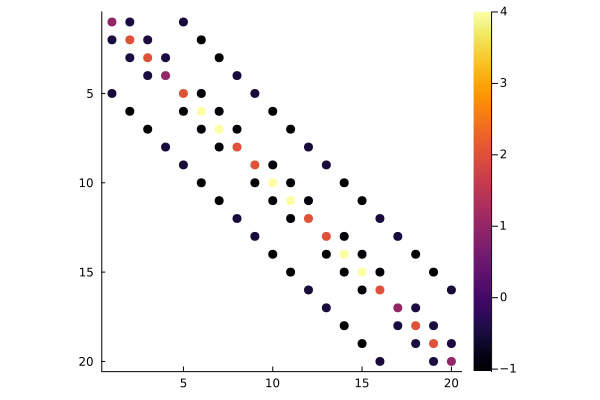

In [6]:
function assembly(
    VX::Vector{Float64},
    VY::Vector{Float64},
    EToV::Matrix{Int64},
    lam1::Float64,
    lam2::Float64,
    qt::Vector{Float64}
)::Tuple{Matrix{Float64}, Vector{Float64}}
    N = size(EToV)[1]
    M = length(VX)

    A = spzeros(M, M)
    b = zeros(M)

    for n in 1:N
        delta, abc = basfun(n, VX, VY, EToV)
        q = abs(delta) * sum(qt[EToV[n, :]]) / 9

        for r in 1:3
            i = EToV[n,r]
            b[i] += q

            for s in 1:3
                j = EToV[n,s]
                A[i,j] += (lam1*abc[r, 2]*abc[s, 2] + lam2*abc[r, 3]*abc[s, 3]) / (4 * abs(delta))
            end
        end
    end

    return A, b
end

lam1 = 1.0
lam2 = 1.0
qt(x, y) = -6*x + 2*y - 2

A, b =  assembly(VX, VY, EToV, lam1, lam2, qt.(VX, VY))
display(A)
display(b)
spy(A, markersize=5)

# Exercise 2.4

20×20 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0   0.0       …   0.0       0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0   0.0           0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0   0.0           0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0   0.0           0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0   0.0           0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   4.00238   …   0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  -0.966102      0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0           0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0           0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  -1.03509       0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0       …  -1.03509   0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0           0.0       0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0   0.0           0.0       0.0  0.0  0.0  0.0  0.0
 0

20-element Vector{Float64}:
 -22.290000000000003
 -10.457222222222226
   9.111111111111109
  36.415
  -0.40199999999999925
 -11.710737403773088
  16.98864856113919
  23.552
   0.5479999999999998
 -42.566798493408655
 -26.5413540489642
  32.349
  21.71399999999999
  95.66445656986153
 220.90473142366272
 103.95999999999998
 104.24999999999997
 154.94411111111106
 213.37377777777775
 279.539

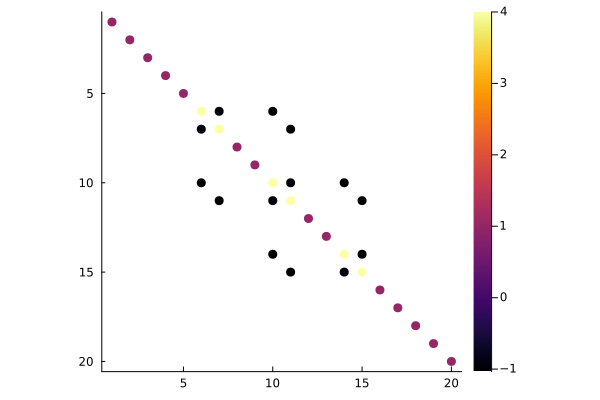

In [7]:

function dirbc(
    bnodes::Vector{Int64}, 
    f::Vector{Float64}, 
    A::Matrix{Float64}, 
    b::Vector{Float64}
)::Tuple{Matrix{Float64}, Vector{Float64}}
    A = copy(A)
    b = copy(b)

    for (i, k) in enumerate(bnodes)
        b[k] = f[i]

        A[k, k] = 0
        indices = findall(A[:,k] .!= 0)
        b[indices] -= A[indices, k] .* f[i]

        A[indices, k] .= 0
        A[k, indices] .= 0
        A[k, k] = 1
    end

    return A, b
end

function get_bnodes(noelms1::Int64, noelms2::Int64)
    return sort(vcat(
        1:noelms2 + 1,
        1 + noelms1*(noelms2 + 1) : (noelms1 + 1)*(noelms2 + 1),
        noelms2 + 2 : noelms2 + 1 : (noelms1 - 1)*noelms2 + noelms1,
        2*noelms2 + 2 : noelms2 + 1 : noelms1*(noelms2 + 1)
    ))
end

f(x,y) = x^3 - x^2*y + y^2 -1
bnodes = get_bnodes(noelms1, noelms2)
A, b = dirbc(bnodes, f.(VX[bnodes], VY[bnodes]), A, b)
display(A)
display(b)
spy(A, markersize=5)


# Exercise 2.5

In [8]:
uhat = A \ b
u(x, y) = x^3 - x^2*y + y^2 - 1
E = maximum(abs.(uhat - u.(VX, VY)))

display(uhat)
display(E)

20-element Vector{Float64}:
 -22.290000000000003
 -10.457222222222226
   9.111111111111109
  36.415
  -0.40199999999999925
  -0.1528888888888887
   7.831777777777779
  23.552
   0.5479999999999998
   3.4127777777777797
  14.013111111111115
  32.349
  21.71399999999999
  41.39377777777776
  68.8091111111111
 103.95999999999998
 104.24999999999997
 154.94411111111106
 213.37377777777775
 279.539

7.105427357601002e-15

"p-values 1, noelms 2.0, error 55.85071111111111"

"p-values 2, noelms 4.0, error 15.652673687141721"

"p-values 3, noelms 8.0, error 4.046801781976418"

"p-values 4, noelms 16.0, error 1.0206836335860272"

"p-values 5, noelms 32.0, error 0.2557434740247917"

"p-values 6, noelms 64.0, error 0.06397183343271617"

Polynomial(5.437814515184364 - 1.9612447301715852*x)

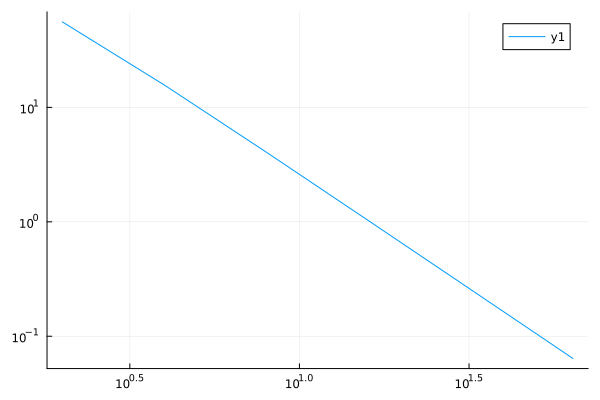

In [9]:
u(x,y) = x^2 * y^2
qt(x,y) = -2*x^2 - 2*y^2

x0 = -2.5
y0 = -4.8
L1 = 7.6
L2 = 5.9
lam1 = 1.0
lam2 = 1.0

N = 6
dofs = zeros(N)
max_errors = zeros(N)

for p in 1:N
    noelms1 = noelms2 = 2^p

    VX, VY = xy(x0, y0, L1, L2, noelms1, noelms2)
    EToV = conelmtab(noelms1, noelms2)

    A, b = assembly(VX, VY, EToV, lam1, lam2, qt.(VX, VY))

    bnodes = get_bnodes(noelms1, noelms2)
    A, b = dirbc(bnodes, u.(VX[bnodes], VY[bnodes]), A, b)

    uhat = A \ b

    dofs[p] = noelms1
    max_errors[p] = maximum(abs.(uhat - u.(VX, VY)))
    display("p-values $p, noelms $(dofs[p]), error $(max_errors[p])")
end

display(fit(log.(dofs), log.(max_errors), 1))
plot(dofs, max_errors, xscale=:log10, yscale=:log10)

# Exercise 2.6

In [10]:
function constructBeds(
    VX::Vector{Float64},
    VY::Vector{Float64},
    EToV::Matrix{Int64},
    tol::Float64,
    fd::Function,
)::Matrix{Int64}
    xc = (VX[EToV] + VX[EToV[:, [2, 3, 1]]]) ./ 2
    yc = (VY[EToV] + VY[EToV[:, [2, 3, 1]]]) ./ 2
    return getindex.(findall(abs.(fd.(xc, yc)) .<= tol), [1 2])
end

x0 = -2.5
y0 = -4.8
L1 = 7.6
L2 = 5.9
noelms1 = 4
noelms2 = 3

VX, VY = xy(x0, y0, L1, L2, noelms1, noelms2)
EToV = conelmtab(noelms1, noelms2)

tol = 0.0001
d(x, y) = min(x - x0, y - y0, x0 + L1 - x, y0 + L2 - y)
beds = constructBeds(VX, VY, EToV, tol, d)
display(beds)

14×2 Matrix{Int64}:
 13  1
 14  1
 15  1
 10  2
 11  2
 12  2
 15  2
 18  2
 21  2
 24  2
  1  3
  4  3
  7  3
 10  3

In [11]:
function edgeIndices(
    EToV::Matrix{Int64},
    beds::Matrix{Int64},
)::Tuple{Vector{Int64}, Vector{Int64}}
    n = beds[:, 1]
    r = beds[:, 2]
    s = r .% 3 .+ 1

    i = EToV[CartesianIndex.(n, r)]
    j = EToV[CartesianIndex.(n, s)]

    return i,j
end

function neubc(
    VX::Vector{Float64},
    VY::Vector{Float64},
    EToV::Matrix{Int64},
    beds::Matrix{Int64},
    q::Vector{Float64},
    b::Vector{Float64}
)::Vector{Float64}
    i, j = edgeIndices(EToV, beds)
    q1 = q .* sqrt.((VX[j] - VX[i]).^2 + (VY[j] - VY[i]).^2) ./ 2

    b[i] -= q1
    b[j] -= q1

    return b
end

neubc (generic function with 1 method)

# Exercise 2.7

In [12]:
function constructBnodes(
    VX::Vector{Float64},
    VY::Vector{Float64},
    tol::Float64,
    fd::Function,
)::Vector{Int64}
    return findall(abs.(fd.(VX, VY)) .<= tol)
end

constructBnodes (generic function with 1 method)

7-element Vector{Int64}:
  1
  2
  3
  4
  8
 12
 16

7-element Vector{Int64}:
  2
  3
  4
  8
 12
 16
 20

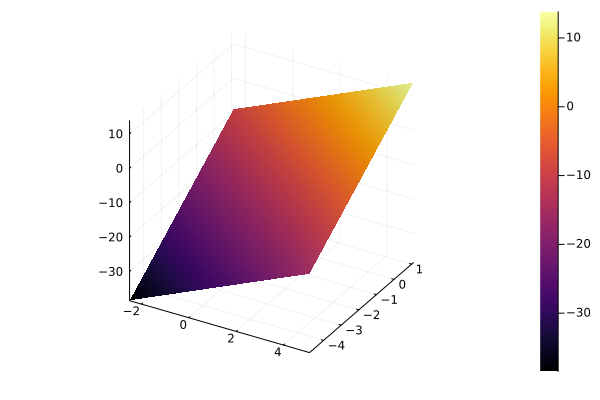

0.0

In [17]:
function solveNDBVP(
    VX::Vector{Float64},
    VY::Vector{Float64},
    EToV::Matrix{Int64},
    lam1::Float64,
    lam2::Float64,
    qt::Function,
    q::Function,
    f::Function,
    fd_gamma1::Function,
    fd_gamma2::Function,
    tol::Float64
)::Vector{Float64}
    A, b = assembly(VX, VY, EToV, lam1, lam2, qt.(VX, VY))
    
    beds = constructBeds(VX, VY, EToV, tol, fd_gamma1)
    i, j = edgeIndices(EToV, beds)
    b = neubc(VX, VY, EToV, beds, q.(VX[i], VY[i], VX[j], VY[j]), b)

    bnodes = constructBnodes(VX, VY, tol, fd_gamma2)
    A, b = dirbc(bnodes, f.(VX[bnodes], VY[bnodes]), A, b)

    uhat = A \ b

    return uhat
end

x0 = -2.5
y0 = -4.8
L1 = 7.6
L2 = 5.9
noelms1 = 4
noelms2 = 3
lam1 = 1.0
lam2 = 1.0

VX, VY = xy(x0, y0, L1, L2, noelms1, noelms2)
EToV = conelmtab(noelms1, noelms2)

u(x, y) = 3.0*x + 5.0*y - 7
ux(x, y) = 3.0
uy(x, y) = 5.0
uxx(x, y) = 0.0
uyy(x, y) = 0.0

qt(x, y) = - uxx(x, y) - uyy(x, y)
f(x, y) = u(x, y)
function q(x1, y1, x2, y2)
    dx = x2 - x1
    dy = y2 - y1
    norm = sqrt(dx^2 + dy^2)
    n1 = dy / norm
    n2 = -dx / norm

    xc = (x1 + x2) / 2
    yc = (y1 + y2) / 2

    return - lam1 * ux(xc, yc) * n1 - lam2 * uy(xc, yc) * n2
end

fd_gamma1(x, y) = min(x - x0, y - y0)
fd_gamma2(x, y) = min(x0 + L1 - x, y0 + L2 - y)
tol = 0.0001

uhat = solveNDBVP(VX,VY,EToV,lam1,lam2,qt,q,f,fd_gamma1,fd_gamma2,tol)
p = scatter(VX, VY, uhat, st=:surface)
scatter!(VX, VY, u.(VX, VY), st=:surface)
display(p)

E = maximum(uhat - u.(VX, VY))

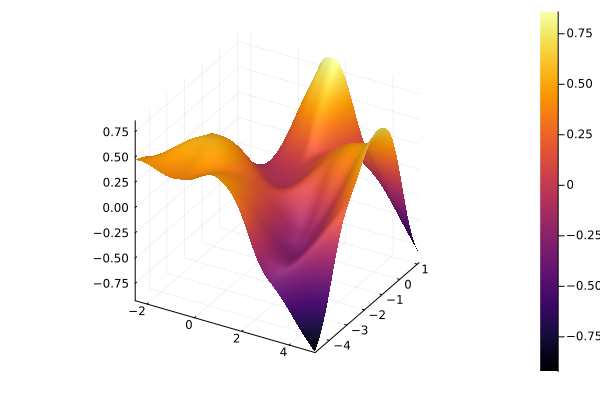

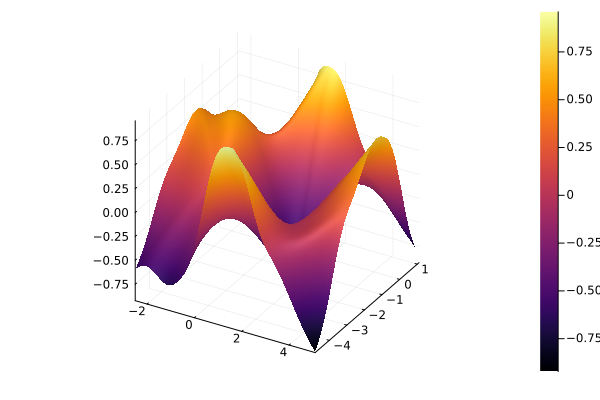

1.0672513417873155

In [15]:
x0 = -2.5
y0 = -4.8
L1 = 7.6
L2 = 5.9
noelms1 = 32
noelms2 = 32
lam1 = 1.0
lam2 = 1.0

u(x, y) = sin(x)*sin(y)
ux(x, y) = cos(x)*sin(y)
uy(x, y) = sin(x)*cos(y)
uxx(x, y) = -sin(x)*sin(y)
uyy(x, y) = -sin(x)*sin(y)

qt(x, y) = - uxx(x, y) - uyy(x, y)
f(x, y) = u(x, y)
function q(x1, y1, x2, y2)
    dx = x2 - x1
    dy = y2 - y1
    norm = sqrt(dx^2 + dy^2)
    n1 = dy / norm
    n2 = -dx / norm

    xc = (x1 + x2) / 2
    yc = (y1 + y2) / 2

    return - lam1 * ux(xc, yc) * n1 - lam2 * uy(xc, yc) * n2
end

fd_gamma1(x, y) = min(x - x0, y - y0)
fd_gamma2(x, y) = min(x0 + L1 - x, y0 + L2 - y)
tol = 0.0001

uhat = solveNDBVP(VX,VY,EToV,lam1,lam2,qt,q,f,fd_gamma1,fd_gamma2,tol)
display(scatter(VX, VY, uhat, st=:surface))
display(scatter(VX, VY, u.(VX, VY), st=:surface))

E = maximum(uhat - u.(VX, VY))